### Ürün Bazında CBAM Maliyet Analizi – Hayali Şirket Çalışması

Aşağıda, hayali bir şirketin iki farklı çelik ürünü (HS6: 721049 ve 720917) için yıllara göre CBAM (Sınırda Karbon Düzenleme Mekanizması) maliyet hesabı gösterilmektedir. Hesaplamada, her ürün için özgül emisyon faktörü ve ilgili yılın AB karbon fiyatı kullanılmıştır.

> **Not:**  
> Bu case study’de yer alan şirketin ihracat miktarları, Türkiye’nin ilgili ürünlerdeki toplam ihracatından türetilen, senaryoya uygun **örnek pazar payı oranları** ile tarafımdan kurgulanmıştır.  
> Tamamen örnekleme ve analiz amaçlıdır.


In [5]:
import pandas as pd

# Dosyaları oku ve başlıkları temizle
df1 = pd.read_excel("yukhesabi_50ton_ustu.xlsx", sheet_name="Annex1")
df2 = pd.read_excel("yukhesabi_50ton_ustu.xlsx", sheet_name="Annex2")

def temizle_sutun_adlari(df):
    return (
        df.columns
        .str.lower()
        .str.replace("ı", "i")
        .str.replace("ü", "u")
        .str.replace("ş", "s")
        .str.replace("ğ", "g")
        .str.replace("ö", "o")
        .str.replace("ç", "c")
        .str.replace(" ", "_")
        .str.strip()
    )

df1.columns = temizle_sutun_adlari(df1)
df2.columns = temizle_sutun_adlari(df2)

# İki dosyayı birleştir
df_all = pd.concat([df1, df2], ignore_index=True)

# Sadece ilgili ürünler
secili_urunler = ['721049', '720917']
df_all['hs6'] = df_all['hs6'].astype(str)   # Tipi garantiye al

df_secili = df_all[df_all['hs6'].isin(secili_urunler)]

# Kontrol: Gerçekten kayıt var mı?
print("Seçili ürünlerdeki ilk 5 satır:\n", df_secili[['hs6', 'ulke_adi', 'cbam_ton']].head())

# Ürün ve ülke bazında toplamları grupla
urun_ulke_grup = df_secili.groupby(['hs6', 'ulke_adi'])['cbam_ton'].sum().reset_index()

# Sonuç: Her ürün için en çok ihracat yapılan ülkeler
for kod in secili_urunler:
    temp = urun_ulke_grup[urun_ulke_grup['hs6'] == kod]
    temp = temp.sort_values(by='cbam_ton', ascending=False)
    print(f"\nÜrün Kodu: {kod} — En Çok İhracat Yapılan Ülkeler:")
    print(temp[['ulke_adi', 'cbam_ton']].head(5))


Seçili ürünlerdeki ilk 5 satır:
        hs6     ulke_adi    cbam_ton
3   721049      Almanya   13720.664
25  721049    Avusturya     119.182
42  721049      Belçika  204006.197
70  721049  Bulgaristan   54000.833
95  721049    Danimarka    6448.746

Ürün Kodu: 721049 — En Çok İhracat Yapılan Ülkeler:
      ulke_adi    cbam_ton
23     İspanya  748452.277
17     Romanya  465765.919
20  Yunanistan  378096.586
4      Belçika  251446.656
25      İtalya  243804.637

Ürün Kodu: 720917 — En Çok İhracat Yapılan Ülkeler:
     ulke_adi  cbam_ton
1  Yunanistan  3726.065
0      Fransa   426.137



YIL - ÜRÜN BAZINDA PAZAR TOPLAMI ve ŞİRKET İHRACATI (ton):
    yil    cbam_ton    urun  sirket_ihracati
0  2021  397394.656  721049      5960.919840
1  2022  218624.815  721049      3279.372225
2  2023  185432.727  721049      2781.490905
3  2024  302880.064  721049      4543.200960
4  2021     145.626  720917         7.281300
5  2022     280.511  720917        14.025550
6  2023    1551.720  720917        77.586000
7  2024    2174.345  720917       108.717250


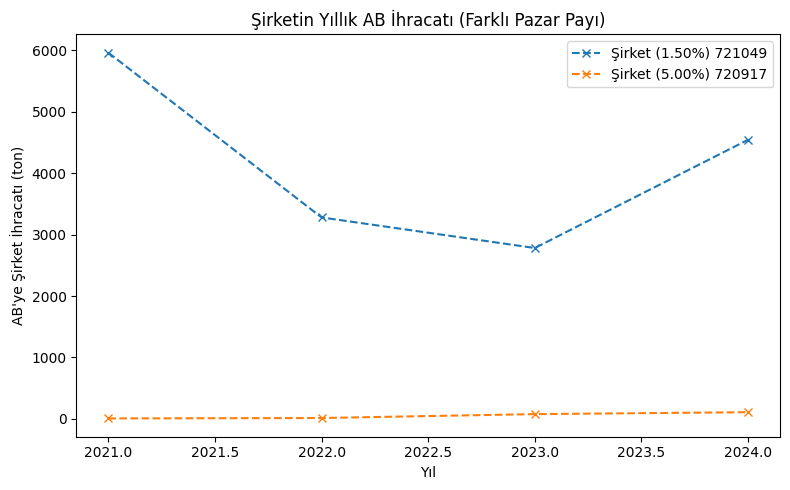

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Sütunları temizleme fonksiyonu
def temizle_sutun_adlari(df):
    return (
        df.columns
        .str.lower()
        .str.replace("ı", "i")
        .str.replace("ü", "u")
        .str.replace("ş", "s")
        .str.replace("ğ", "g")
        .str.replace("ö", "o")
        .str.replace("ç", "c")
        .str.replace(" ", "_")
        .str.strip()
    )

# 1.
df1 = pd.read_excel("yukhesabi_50ton_ustu.xlsx", sheet_name="Annex1")
df2 = pd.read_excel("yukhesabi_50ton_ustu.xlsx", sheet_name="Annex2")
df1.columns = temizle_sutun_adlari(df1)
df2.columns = temizle_sutun_adlari(df2)

# 2.
ab_ulkeleri = ['romanya', 'fransa', 'italya', 'ispanya', 'belçika', 'yunanistan']

# 3. Pazar payı 
oran1 = 0.015 # %1,5 pazar payı
oran2=0.05 # %5 pazar payı

# 4. Annex1: Sadece 721049 ve seçili ülkeler
df1_secili = df1[
    (df1['hs6'].astype(str) == '721049') &
    (df1['ulke_adi'].str.lower().isin(ab_ulkeleri))
]
yil_toplam1 = df1_secili.groupby('yil')['cbam_ton'].sum().reset_index()
yil_toplam1['urun'] = '721049'
yil_toplam1['sirket_ihracati'] = yil_toplam1['cbam_ton'] * oran1

# 5. Annex2: Sadece 720917 ve seçili ülkeler
df2_secili = df2[
    (df2['hs6'].astype(str) == '720917') &
    (df2['ulke_adi'].str.lower().isin(ab_ulkeleri))
]
yil_toplam2 = df2_secili.groupby('yil')['cbam_ton'].sum().reset_index()
yil_toplam2['urun'] = '720917'
yil_toplam2['sirket_ihracati'] = yil_toplam2['cbam_ton'] * oran2

# 6. 
df_grafik = pd.concat([yil_toplam1, yil_toplam2], ignore_index=True)

print("\nYIL - ÜRÜN BAZINDA PAZAR TOPLAMI ve ŞİRKET İHRACATI (ton):")
print(df_grafik)

# 7. Grafik
plt.figure(figsize=(8,5))
for kod, oran in zip(['721049', '720917'], [oran1, oran2]):
    data = df_grafik[df_grafik['urun'] == kod]
    plt.plot(data['yil'], data['sirket_ihracati'], marker='x', linestyle='--', label=f"Şirket ({oran*100:.2f}%) {kod}")

plt.ylabel("AB'ye Şirket İhracatı (ton)")
plt.xlabel("Yıl")
plt.title("Şirketin Yıllık AB İhracatı (Farklı Pazar Payı)")
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
print("Oran1:", oran1, "Oran2:", oran2)
print(df_grafik[['urun', 'yil', 'cbam_ton', 'sirket_ihracati']])

Oran1: 0.015 Oran2: 0.05
     urun   yil    cbam_ton  sirket_ihracati
0  721049  2021  397394.656      5960.919840
1  721049  2022  218624.815      3279.372225
2  721049  2023  185432.727      2781.490905
3  721049  2024  302880.064      4543.200960
4  720917  2021     145.626         7.281300
5  720917  2022     280.511        14.025550
6  720917  2023    1551.720        77.586000
7  720917  2024    2174.345       108.717250


In [8]:
# Ürün bazında şirket pazar payları
oranlar = {'721049': 0.015, '720917': 0.05}

# Annex1 ve Annex2'yi birleştir
df1['urun'] = '721049'
df2['urun'] = '720917'
df_all = pd.concat([df1, df2], ignore_index=True)
df_all['hs6'] = df_all['hs6'].astype(str)

secili_urunler = ['721049', '720917']
df_secili = df_all[df_all['hs6'].isin(secili_urunler)]

# Her yıl, ülke, ürün için toplam ihracatı al
yil_ulke_urun = df_secili.groupby(['yil', 'ulke_adi', 'urun'])['cbam_ton'].sum().reset_index()

# Şirket ihracatını hesapla (her ürüne kendi oranını uygula)
yil_ulke_urun['sirket_ihracati'] = yil_ulke_urun.apply(
    lambda row: row['cbam_ton'] * oranlar[row['urun']], axis=1
)

# Sonucu Excel'e yazdır
yil_ulke_urun.to_excel("hayali_sirket_yil_ulke_urun.xlsx", index=False)


,yil,urun,sirket_ihracati,ithalatci_cbam_cost_euro
0,2021,721049,5960.919840,798465.212568
1,2022,721049,3279.372225,616521.978300
2,2023,721049,2781.490905,542529.801020
3,2024,721049,4543.200960,693973.946640
4,2021,720917,7.281300,842.519223
5,2022,720917,14.025550,2277.749320
6,2023,720917,77.586000,13072.465140
7,2024,720917,108.717250,14345.241137


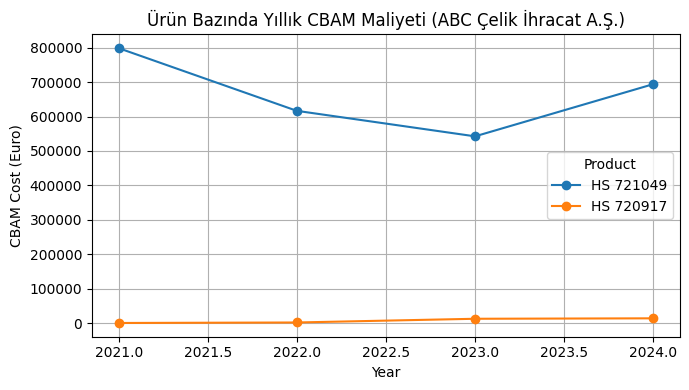

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data
df_grafik = pd.DataFrame({
    "yil": [2021, 2022, 2023, 2024, 2021, 2022, 2023, 2024],
    "urun": ["721049"]*4 + ["720917"]*4,
    "sirket_ihracati": [5960.919840, 3279.372225, 2781.490905, 4543.200960,
                        7.2813, 14.02555, 77.586, 108.71725]
})

# Emission factors and carbon prices
emisyon_faktorleri = {'721049': 2.35, '720917': 2.03}
karbon_fiyatlari = {2021: 57, 2022: 80, 2023: 83, 2024: 65}

def hesapla_cbam(row):
    faktör = emisyon_faktorleri[row['urun']]
    fiyat = karbon_fiyatlari[row['yil']]
    miktar = row['sirket_ihracati']
    return miktar * faktör * fiyat

df_grafik['ithalatci_cbam_cost_euro'] = df_grafik.apply(hesapla_cbam, axis=1)

# Print table
display(df_grafik)

# Optional: Save as Excel for sharing

plt.figure(figsize=(7,4))
for urun in df_grafik["urun"].unique():
    subset = df_grafik[df_grafik["urun"] == urun]
    plt.plot(subset["yil"], subset["ithalatci_cbam_cost_euro"], marker="o", label=f"HS {urun}")

plt.title("Ürün Bazında Yıllık CBAM Maliyeti (ABC Çelik İhracat A.Ş.)")
plt.xlabel("Year")
plt.ylabel("CBAM Cost (Euro)")
plt.grid(True)
plt.legend(title="Product")
plt.tight_layout()
plt.savefig("cbam_cost_trend.png", dpi=300)
plt.show()
